In [6]:
import pandas as pd
import numpy as np

In [12]:
original_data = pd.read_csv("adult.csv", names=["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Marital Status", "Occupation", "Relationship", "Race", "Gender", "Capital Gain", "Capital Loss", "Hours per week", "Country", "Target"], sep=r'\s*,\s*', engine='python', na_values="?")

In [13]:
original_data.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


C:\Users\User\AppData\Local\Temp\ipykernel_1124\3543764762.py:12: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if original_data.dtypes[column] == np.object:
C:\Users\User\AppData\Local\Temp\ipykernel_1124\3543764762.py:12: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if original_data.dtypes[column] == np.object:
C:\Users\User\AppData\Local\Temp\ipykernel_1124\3543764762.py:12: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this 

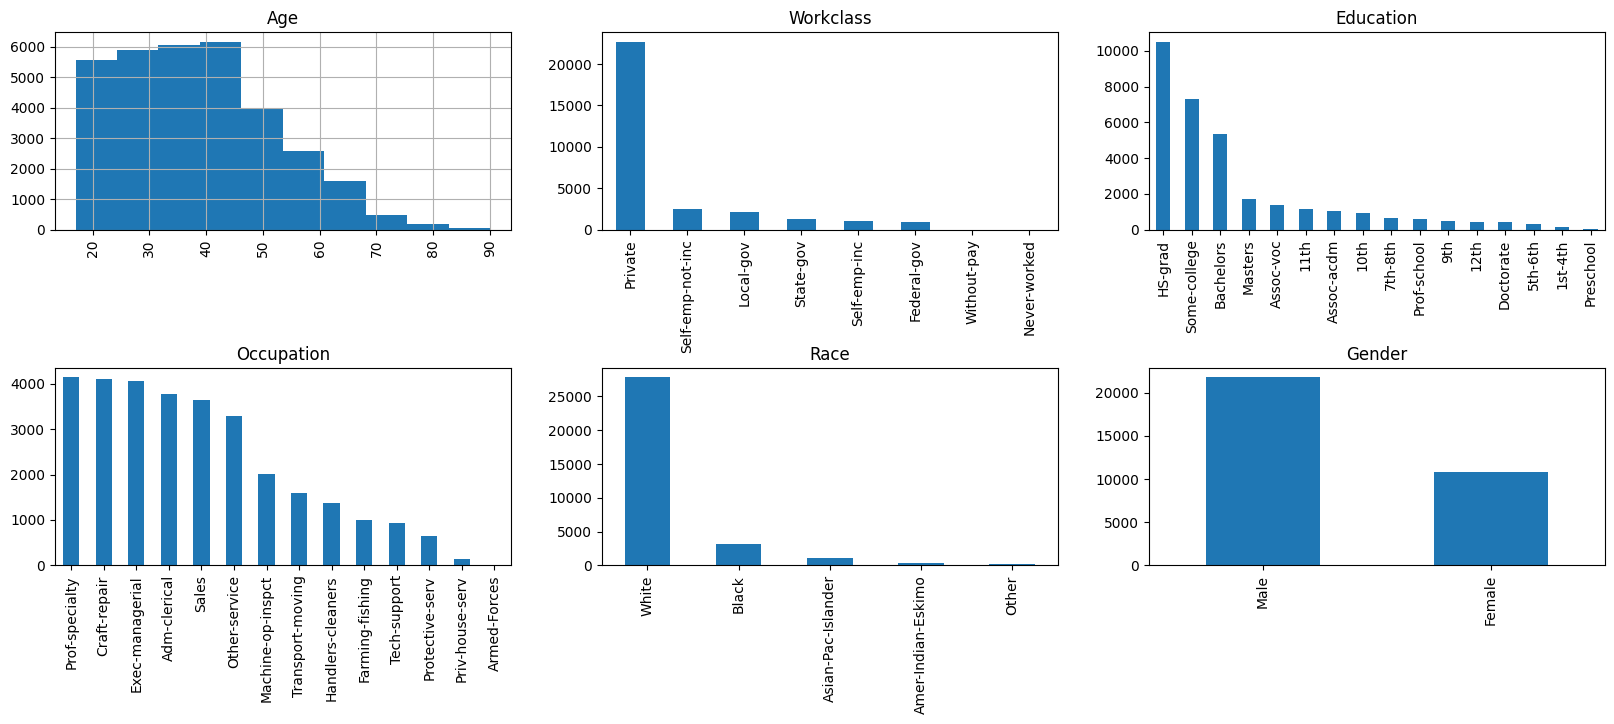

In [15]:
import matplotlib.pyplot as plt
import math
%matplotlib inline

fig = plt.figure(figsize=(20,20))
cols = 3
rows = math.ceil(float(original_data.shape[1]) / cols)

for i, column in enumerate(['Age', 'Workclass', 'Education', 'Occupation', 'Race', 'Gender']):
    ax = fig.add_subplot(rows, cols, i +1)
    ax.set_title(column)
    if original_data.dtypes[column] == np.object:
        original_data[column].value_counts().plot(kind="bar", axes=ax)
    else:
        original_data[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)
plt.show()

In [22]:
# Use LabelEncoder to transform text to numbers
import sklearn.preprocessing as preprocessing

le = preprocessing.LabelEncoder()
original_data['Occupation'] = le.fit_transform(original_data['Occupation'].astype(str))
original_data.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,0,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,8,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,10,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,10,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,14,Wife,Black,Female,0,0,40,Cuba,<=50K


In [23]:
original_data['Target'] = le.fit_transform(original_data['Target'].astype(str))
original_data.tail()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Target
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,4,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,11,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,0,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,0,Own-child,White,Male,0,0,20,United-States,0
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,8,Wife,White,Female,15024,0,40,United-States,1


In [24]:
original_data.Target.unique()

array([0, 1])

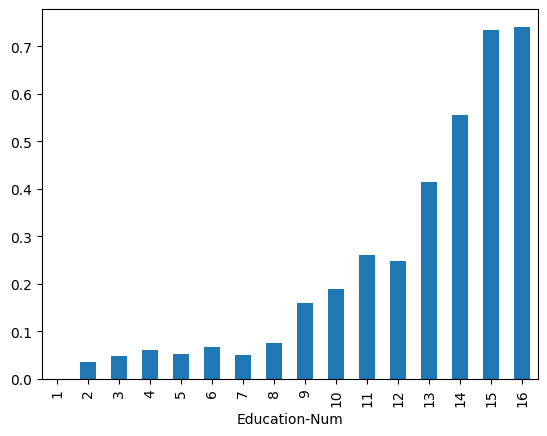

In [25]:
original_data.groupby('Education-Num').Target.mean().plot(kind='bar')
plt.show()